# MATH 210 Introduction to Mathematical Computing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import scipy.linalg as la
%matplotlib inline

## Euler's Three Body Problem

[Euler's three-body problem](https://en.wikipedia.org/wiki/Euler%27s_three-body_problem) is a simplified (and admittedly physically impossible) version of the three-body problem. Euler's problem considers two stars fixed in space and a planet orbiting the stars in 2 dimensions. We will derive the equations of motion of the planet and then plot trajectories using SciPy's ODE solver `odeint`.

Use the following units:

* Astronomical units (AU)
* Years
* Solar mass (multiples of the mass of the Earth's Sun)

With these units, the gravitational constant is $G = 4 \pi^2$. Introduce variables for the planet and the stars:

* $m_{S_1}$ - mass of star 1
* $m_{S_2}$ - mass of star 2
* $m_P$ - mass of the planet
* $x_{S_1}$ - (fixed) $x$-position of star 1
* $y_{S_1}$ - (fixed) $y$-position of star 1
* $x_{S_2}$ - (fixed) $x$-position of star 2
* $y_{S_2}$ - (fixed) $x$-position of star 2
* $x_P$ - $x$-position of the planet
* $y_P$ - $y$-position of the planet
* $\mathbf{x} = (x_P,y_P)$ - position vector of the planet

Let $\mathbf{F}_1$ be the force of gravity of star 1 acting on the planet, and let $\mathbf{F}_2$ be the force of gravity of star 2 acting on the planet. [Newton's Law of Gravity](https://en.wikipedia.org/wiki/Newton%27s_law_of_universal_gravitation) states:

\begin{align}
\mathbf{F}_1 &= - \frac{ G m_P m_{S_1} }{ || \mathbf{d}_1 ||^2} \frac{ \mathbf{d}_1 }{ || \mathbf{d}_1 || } \\
\mathbf{F}_2 &= - \frac{ G m_P m_{S_2} }{ || \mathbf{d}_2 ||^2} \frac{ \mathbf{d}_2 }{ || \mathbf{d}_2 || }
\end{align}

where $\mathbf{d}_1 = (x_P-x_{S_1},y_P-y_{S_1})$ is the vector from star 1 to the planet, and $\mathbf{d}_2 = (x_P-x_{S_2},y_P-y_{S_2})$ is the vector from star 2 to the planet.

[Newton's Second Law of Motion](https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion) states:

$$
\frac{ d^2 \mathbf{x} }{ dt^2 } = \mathbf{F}_1 + \mathbf{F}_2
$$

and this leads us to the system of second order ODEs which govern the motion of the planet:

\begin{align}
\frac{d^2x_P}{dt^2} &= - \frac{ G m_{S_1} (x_P - x_{S_1}) }{ || \mathbf{d}_1 ||^3} - \frac{ G m_{S_2} (x_P - x_{S_2}) }{ || \mathbf{d}_2 ||^3} \\
\frac{d^2y_P}{dt^2} &= - \frac{ G m_{S_1} (y_P - y_{S_1}) }{ || \mathbf{d}_1 ||^3} - \frac{ G m_{S_2} (y_P - y_{S_2}) }{ || \mathbf{d}_2 ||^3}
\end{align}


To plot trajectories of the planet using `odeint`, we first need to write the system as a first order system. Introduce new variables $u_1 = x_P$, $u_2 = x_P'$, $u_3 = y_P$ and $u_4 = y_P'$ and write

\begin{align}
u_1' &= u_2 \\
u_2' &= - \frac{ G m_{S_1} (u_1 - x_{S_1}) }{ || \mathbf{d}_1 ||^3} - \frac{ G m_{S_2} (u_1 - x_{S_2}) }{ || \mathbf{d}_2 ||^3} \\
u_3' &= u_4 \\
u_4' &= - \frac{ G m_{S_1} (u_3 - y_{S_1}) }{ || \mathbf{d}_1 ||^3} - \frac{ G m_{S_2} (u_3 - y_{S_2}) }{ || \mathbf{d}_2 ||^3}
\end{align}

where $\mathbf{d}_1 = (u_1-x_{S_1},u_3-y_{S_1})$ and $\mathbf{d}_2 = (u_1-x_{S_2},u_3-y_{S_2})$.

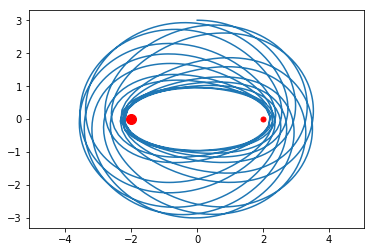

In [2]:
G = 4*np.pi**2 # Gravitational constant
S1 = [-2,0] # Coordinates of Star 1
S2 = [2,0] # Coordinates of Star 2
M1 = 2 # Mass of Star 1 (in solar mass)
M2 = 1 # Mass of Star 2 (in solar mass)

def f(u,t):
    d1 = la.norm([u[0]-S1[0],u[2]-S1[1]])
    d2 = la.norm([u[0]-S2[0],u[2]-S2[1]])
    dudt = [0,0,0,0]
    dudt[0] = u[1]
    dudt[1] = -G*M1*(u[0]-S1[0])/d1**3 - G*M2*(u[0]-S2[0])/d2**3
    dudt[2] = u[3]
    dudt[3] = -G*M1*(u[2]-S1[1])/d1**3 - G*M2*(u[2]-S2[1])/d2**3
    return dudt

u0 = [0,5,3,0] # Initial conditions of the planet: [xposition,xvelocity,yposition,yvelocity]
t = np.linspace(0,30,2000) # Array of time values (in years)
u = spi.odeint(f,u0,t) # Solve system: u = [xposition,xvelocity,yposition,yvelocity]

plt.plot(u[:,0],u[:,2]) # Plot trajectory of the planet
plt.plot(S1[0],S1[1],'ro',markersize=5*M1) # Plot Star 1 as a red star
plt.plot(S2[0],S2[1],'ro',markersize=5*M2) # Plot Star 2 as a red star
plt.axis('equal')
plt.show()

Let's put the code above into a function that we can call with different initial conditions to see what kinds of orbits we can create!

In [3]:
def euler_three_body(S1,S2,M1,M2,u0,tf,numpoints=1000):
    '''
    Plot the trajectory of a planet in Euler's three-body problem.
    
    S1 - list of length 2, coordinates of Star 1
    S2 - list of length 2, coordinates of Star 2
    M1 - mass of Star 1 (in solar mass)
    M2 - mass of Star 2 (in solar mass)
    u0 - list of length 4, initial conditions of the planet: [xposition,xvelocity,yposition,yvelocity]
    tf - final time (in years), plot the trajectory for t in [0,tf]
    numpoints - the number of time values in the plot (default 1000)
    '''
    
    # Define the vector function on the right side of the system of the equations
    def f(u,t):
        d1 = la.norm([u[0]-S1[0],u[2]-S1[1]])
        d2 = la.norm([u[0]-S2[0],u[2]-S2[1]])
        dudt = [0,0,0,0]
        dudt[0] = u[1]
        dudt[1] = -G*M1*(u[0]-S1[0])/d1**3 - G*M2*(u[0]-S2[0])/d2**3
        dudt[2] = u[3]
        dudt[3] = -G*M1*(u[2]-S1[1])/d1**3 - G*M2*(u[2]-S2[1])/d2**3
        return dudt

    t = np.linspace(0,tf,numpoints) # Array of time values (in years)
    u = spi.odeint(f,u0,t) # Solve system: u = [xposition,xvelocity,yposition,yvelocity]

    plt.plot(u[:,0],u[:,2]) # Plot trajectory of the planet
    plt.plot(S1[0],S1[1],'ro',markersize=5*M1) # Plot Star 1 as a red star
    plt.plot(S2[0],S2[1],'ro',markersize=5*M2) # Plot Star 2 as a red star
    plt.axis('equal')
    plt.show()

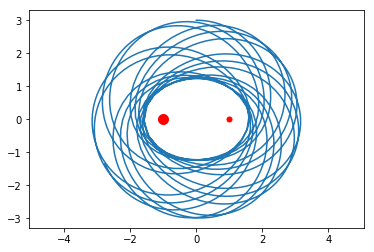

In [4]:
euler_three_body([-1,0],[1,0],2,1,[0,5,3,0],30)

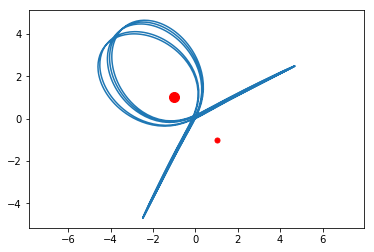

In [5]:
euler_three_body([-1,1],[1,-1],2,1,[0,10,0,5],30)

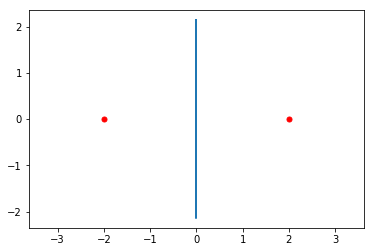

In [6]:
euler_three_body([-2,0],[2,0],1,1,[0,0,0,5],5)

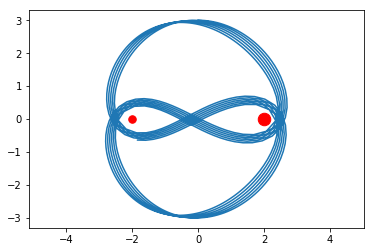

In [7]:
euler_three_body([-2,0],[2,0],1.5,2.5,[0,4.8,3,0],20)